In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define Antoine's Equation
def antoine_equation(T, A, B, C):
    return 10 ** (A - B / (C + T))

# Generate synthetic dataset
num_samples = 5000
A_samples = np.random.uniform(7.5, 8.5, num_samples)
B_samples = np.random.uniform(1600, 1800, num_samples)
C_samples = np.random.uniform(220, 240, num_samples)
T_samples = np.random.uniform(0, 100, num_samples)

pressures = [antoine_equation(T, A, B, C) for T, A, B, C in zip(T_samples, A_samples, B_samples, C_samples)]
inputs = np.column_stack([A_samples, B_samples, C_samples, T_samples])

# Convert to PyTorch tensors
x_data = torch.tensor(inputs, dtype=torch.float32)
y_data = torch.tensor(pressures, dtype=torch.float32).view(-1, 1)

# Define the ANN
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(4, 10)
        self.fc2 = nn.Linear(10, 10)
        self.fc3 = nn.Linear(10, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the ANN
model = Net()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=5e-4)

# Train the ANN
epochs = 500000
report_interval = 10000
for epoch in range(epochs):
    # Forward pass
    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % report_interval == 0:
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {loss.item():.4f}")

print("Training complete.")


Epoch [10000/500000], Loss: 41486.9648
Epoch [20000/500000], Loss: 19545.0391
Epoch [30000/500000], Loss: 16960.9277
Epoch [40000/500000], Loss: 16130.5166
Epoch [50000/500000], Loss: 15367.1836
Epoch [60000/500000], Loss: 14575.6396
Epoch [70000/500000], Loss: 13798.8828
Epoch [80000/500000], Loss: 12993.9150
Epoch [90000/500000], Loss: 12247.5430
Epoch [100000/500000], Loss: 11513.7744
Epoch [110000/500000], Loss: 10796.3076
Epoch [120000/500000], Loss: 10078.0918
Epoch [130000/500000], Loss: 9402.8340
Epoch [140000/500000], Loss: 8790.6826
Epoch [150000/500000], Loss: 8183.7544
Epoch [160000/500000], Loss: 7720.7622
Epoch [170000/500000], Loss: 8184.4023
Epoch [180000/500000], Loss: 7057.5186
Epoch [190000/500000], Loss: 6731.5542
Epoch [200000/500000], Loss: 6605.8110
Epoch [210000/500000], Loss: 6587.4629
Epoch [220000/500000], Loss: 6343.4360
Epoch [230000/500000], Loss: 6278.7070
Epoch [240000/500000], Loss: 6256.0366
Epoch [250000/500000], Loss: 6217.4902
Epoch [260000/500000],

Mean Squared Error on Test Data: 6284.2725
R^2 Score: 0.9596


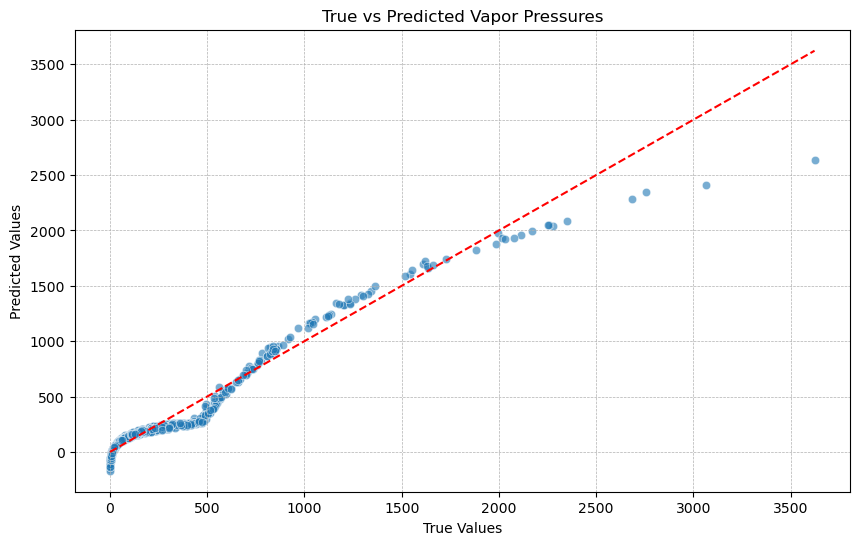

In [10]:
import matplotlib.pyplot as plt

# Generate test dataset
num_test_samples = 1000
A_test = np.random.uniform(7.5, 8.5, num_test_samples)
B_test = np.random.uniform(1600, 1800, num_test_samples)
C_test = np.random.uniform(220, 240, num_test_samples)
T_test = np.random.uniform(0, 100, num_test_samples)

test_pressures = [antoine_equation(T, A, B, C) for T, A, B, C in zip(T_test, A_test, B_test, C_test)]
test_inputs = np.column_stack([A_test, B_test, C_test, T_test])

# Convert to PyTorch tensors
x_test = torch.tensor(test_inputs, dtype=torch.float32)
y_true_test = torch.tensor(test_pressures, dtype=torch.float32).view(-1, 1)

# Predict using the trained model
model.eval()
with torch.no_grad():
    y_pred = model(x_test)

# Compute MSE
mse = ((y_pred - y_true_test) ** 2).mean().item()
ss_res = ((y_pred - y_true_test) ** 2).sum()
ss_tot = ((y_true_test - y_true_test.mean()) ** 2).sum()
r2 = 1 - ss_res / ss_tot
r2 = r2.item()
print(f"Mean Squared Error on Test Data: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# Plotting true vs predicted values

plt.figure(figsize=(10, 6))
plt.scatter(y_true_test.numpy(), y_pred.numpy(), alpha=0.6, edgecolors='w', linewidth=0.5)
plt.plot([min(y_true_test), max(y_true_test)], [min(y_true_test), max(y_true_test)], '--r')  # Ideal line
plt.title("True vs Predicted Vapor Pressures")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()
